In [360]:
from matplotlib import pyplot as plt
import numpy as np
import scipy
import pandas as pd
import statsmodels
import statsmodels.api as sm

# importing the style package
from matplotlib import style  
# using the style for the plot
plt.style.use('seaborn-v0_8-darkgrid')
floatfmt = '.2f'
np.set_printoptions(precision=6)

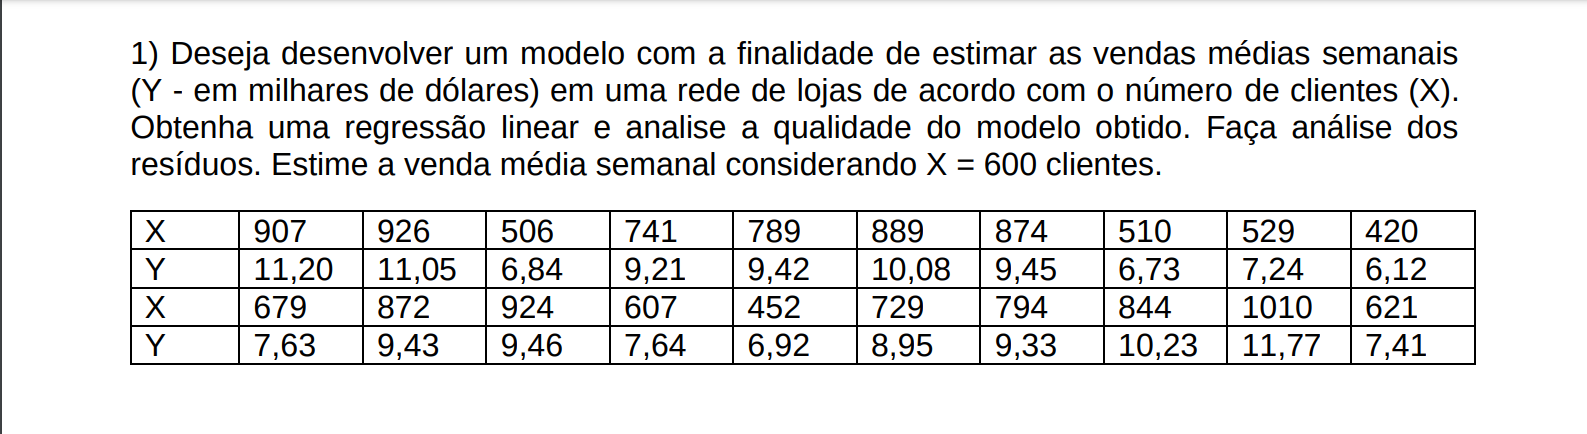

In [361]:
X = np.array([907, 926, 506, 741, 789, 889, 874, 510, 529, 420, 679, 872, 924, 607, 452, 729, 794, 844, 1010, 621])
Y = np.array([11.20, 11.05, 6.84, 9.21, 9.42, 10.08, 9.45, 6.73, 7.24, 6.12, 7.63, 9.43, 9.46, 7.64, 6.92, 8.95, 9.33, 10.23, 11.77, 7.41])

X = pd.DataFrame(X, columns=['X'])
X = sm.add_constant(X)

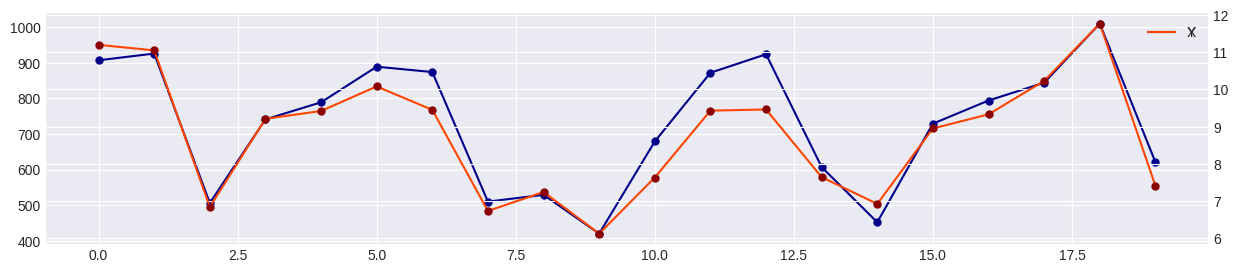

In [362]:
fig, ax = plt.subplots(figsize=(15,3))
ax2 = ax.twinx()
ax.plot(X.X, label='X', c='darkblue')
ax2.plot(Y, label='Y', c='orangered')
ax.scatter(range(len(X)), X.X, s=25, c='darkblue', zorder=3)
ax2.scatter(range(len(Y)), Y, s=25, c='darkred', zorder=3)
ax.legend()
ax2.legend()
plt.show()

In [363]:
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     186.2
Date:                Sat, 01 Jul 2023   Prob (F-statistic):           6.21e-11
Time:                        21:49:40   Log-Likelihood:                -13.522
No. Observations:                  20   AIC:                             31.04
Df Residuals:                      18   BIC:                             33.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4230      0.481      5.038      0.000       1.413       3.434
X              0.0087      0.001     13.646      0.000       0.007       0.010
==============================================================================
Omnibus:                        0.608   Durbin-Watson:                   1.013
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.622
Skew:                          -0.347   Prob(JB):                        0.733
Kurtosis:                       2.485   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/home/fernandopapi/.cache/pypoetry/virtualenvs/mbausp-XlZAh_dq-py3.8/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


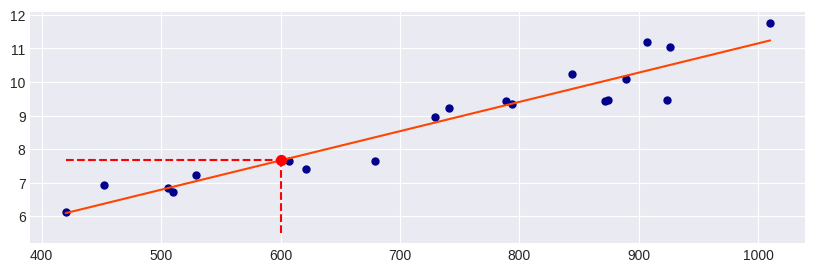


X=600, Y_hat = [7.660647]


In [364]:
fig, ax = plt.subplots(figsize=(10,3))
ax.scatter(X.X, Y, s=25, c='darkblue', zorder=3)

y_p = 600
y_h = model.predict((1,y_p))

min_x = X[X.X==min(X.X)]
max_x = X[X.X==max(X.X)]

min_y_hat = model.predict(min_x).values
max_y_hat = model.predict(max_x).values

ax.plot([min_x.X, max_x.X], [min_y_hat, max_y_hat], c='orangered', zorder=3)
ax.scatter(y_p, y_h, s=50, c='red', zorder=3)
ax.plot([y_p, y_p], [0.9*min(Y), y_h], 'r--', zorder=3)
ax.plot([min_x.X.values, y_p], [y_h, y_h], 'r--', zorder=3)
plt.show()
print('\nX=600, Y_hat =', y_h)

mean -9.325873406851315e-16
std 0.4757601340848472

Shapiro-Wilk test dos residuais -> pvalue: 0.7665435671806335.
Falha-se em rejeitar a hipótese nula, ou seja, os residuais são normalmente distribuídos



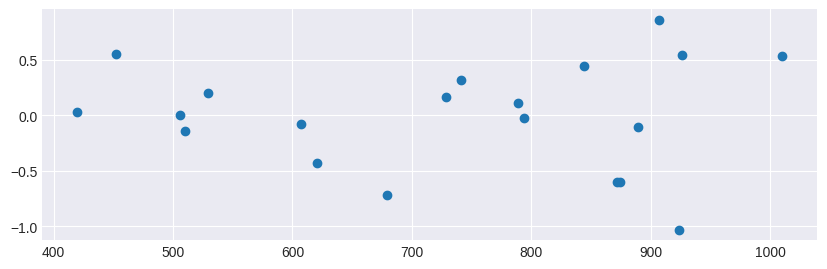

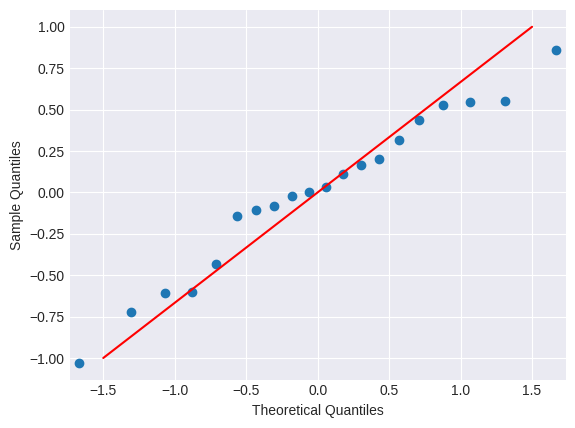

In [365]:
print('mean', np.mean(model.wresid))
print('std', np.std(model.wresid))
fig, axs = plt.subplots(1,1, figsize=(10,3))
axs.scatter(X.X, model.wresid)
sm.qqplot(model.wresid)
plt.plot([-1.5, 1.5], [-1,1],'r')
pvalue = scipy.stats.shapiro(model.wresid).pvalue
print()
print(f'Shapiro-Wilk test dos residuais -> pvalue: {pvalue}.\nFalha-se em rejeitar a hipótese nula, ou seja, os residuais são normalmente distribuídos')
print()

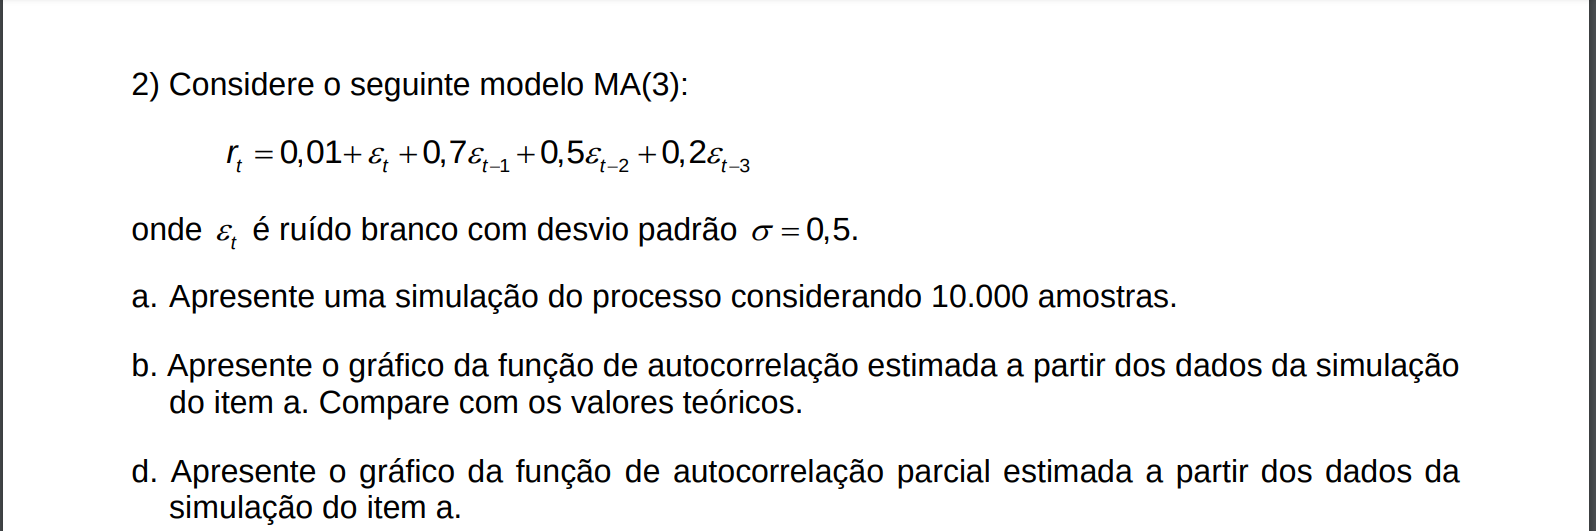

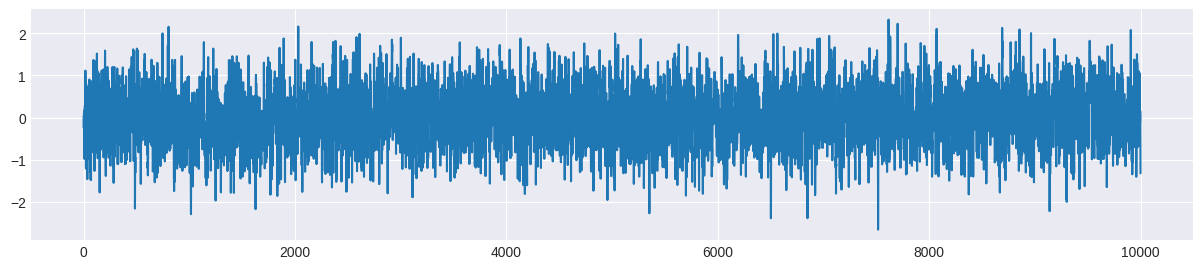

In [366]:
gen = scipy.stats.norm(0, 0.5)
y = gen.rvs(10000)
y = [0.01 + y_t + 0.7*y[t-1] + 0.5*y[t-2] + 0.2*y[t-3] if t>=3 else y_t for t, y_t in enumerate(y)]
fig, ax = plt.subplots(figsize=(15,3))
p = ax.plot(y)


In [367]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

[ 1.000000e+00  6.436929e-01  3.580470e-01  1.149821e-01  5.323531e-03
 -4.555688e-04]


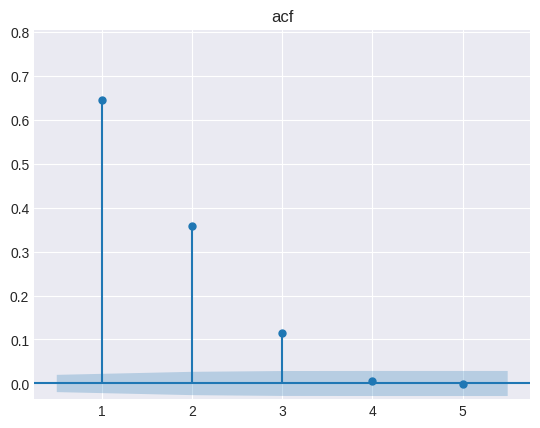

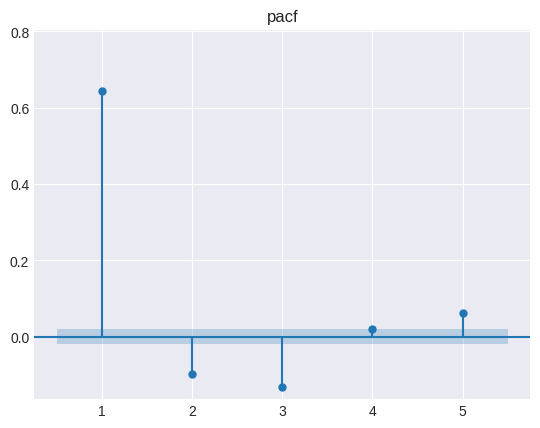

In [368]:
lags = 5

autocorrelations = acf(y, nlags=5)
print(autocorrelations)

plot_acf(y, alpha=0.05, lags=lags, zero=False, auto_ylims=True, title=f'acf')
plot_pacf(y, alpha=0.05, lags=lags, zero=False, auto_ylims=True, title=f'pacf')
plt.show()

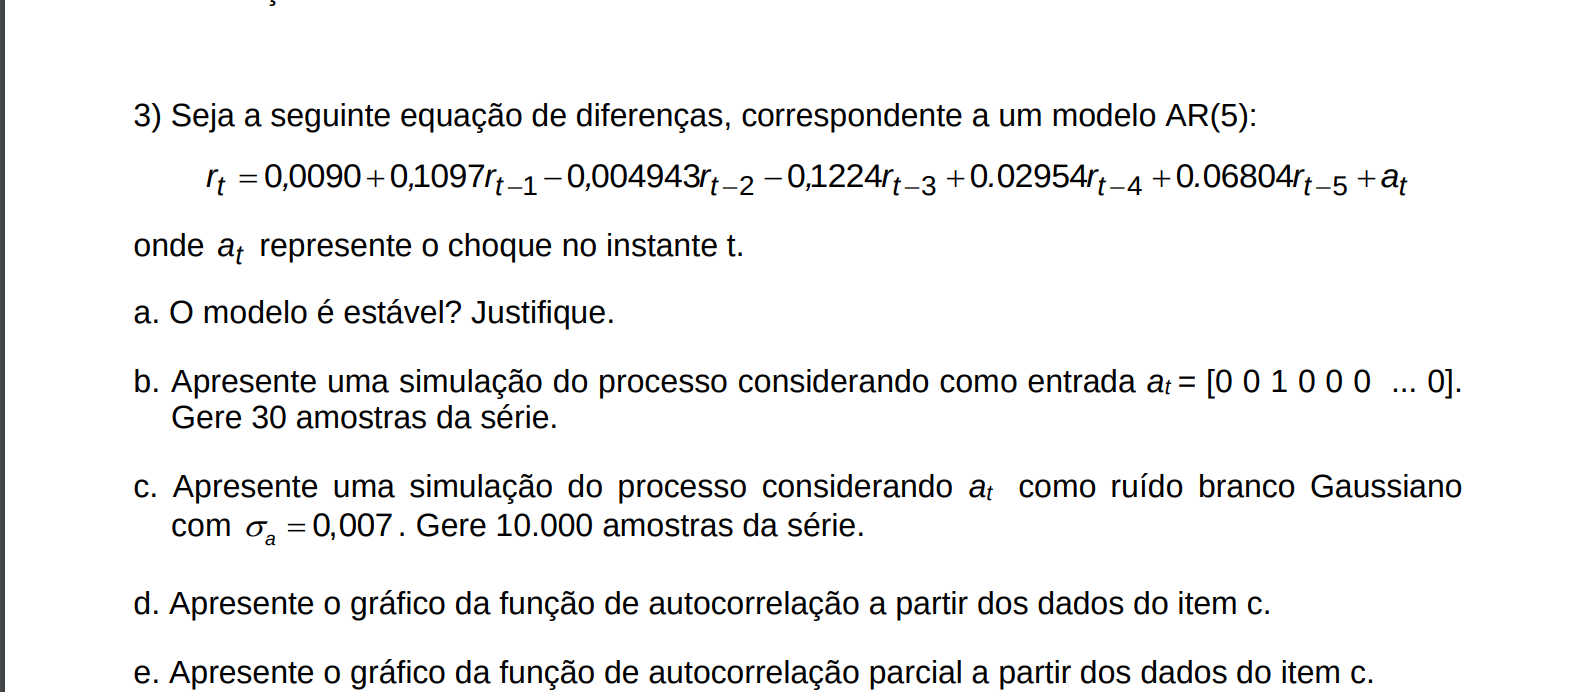

In [369]:
c = 0.0090 
p1 = 0.1097
p2 = -0.004943 
p3 = -0.1224
p4 = 0.02954
p5 = 0.06804

p = [p1, p2, p3, p4, p5]

In [370]:
z_poly = np.polynomial.polynomial.Polynomial((1, -p1, -p2, -p3, -p4, -p5))
for r in z_poly.roots():
    print(r, np.abs(r))

(-1.6676292579602663-0.8842381427836801j) 1.8875551475807641
(-1.6676292579602663+0.8842381427836801j) 1.8875551475807641
(0.5608253158304926-1.4155110154081532j) 1.522562468215407
(0.5608253158304926+1.4155110154081532j) 1.522562468215407
(1.7794515056587255+0j) 1.7794515056587255


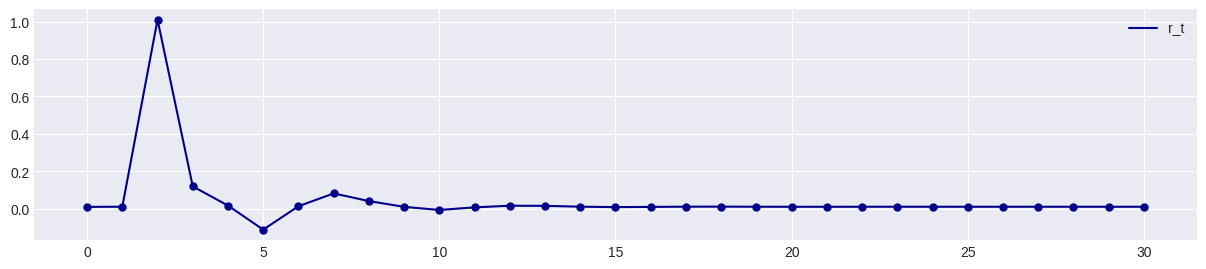

In [371]:
a_t = np.array([0,0,1] + [0,]*28) 
r_t = []

for i, a in enumerate(a_t):
    if i <= 5:
        r_lag = np.array(r_t[:i+1])
        p_lag = np.array(p[:i])[::-1]
        r_i = c + a + np.sum(p_lag*r_lag)
        r_t.append(r_i)
        continue

    r_lag = np.array(r_t[i-5:i])
    p_lag = p[::-1]
    r_i = c + a + np.sum(p_lag*r_lag)
    r_t.append(r_i)

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(r_t, label='r_t', c='darkblue')
ax.scatter(range(len(r_t)), r_t, s=25, c='darkblue', zorder=3)
ax.legend()
plt.show()

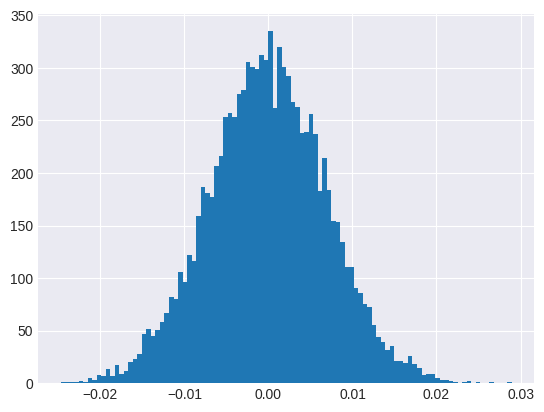

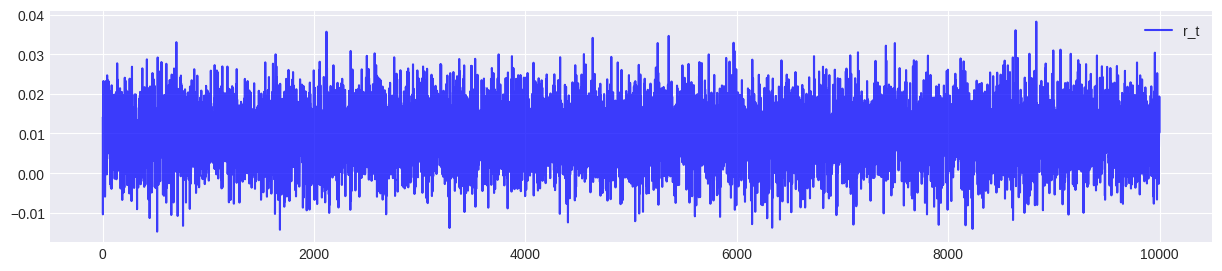

[ 1.        0.09418  -0.010475 -0.132531  0.002848  0.059128  0.018178
 -0.022987 -0.011754 -0.003871  0.020599]


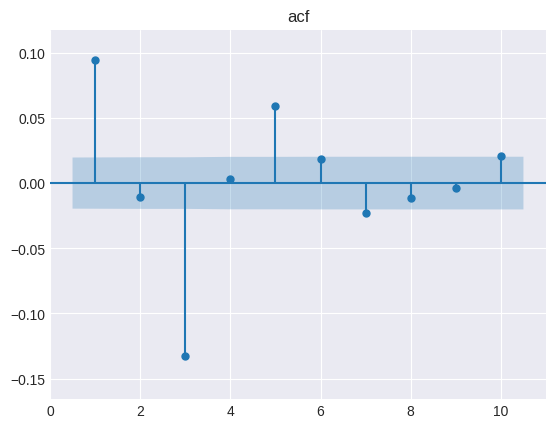

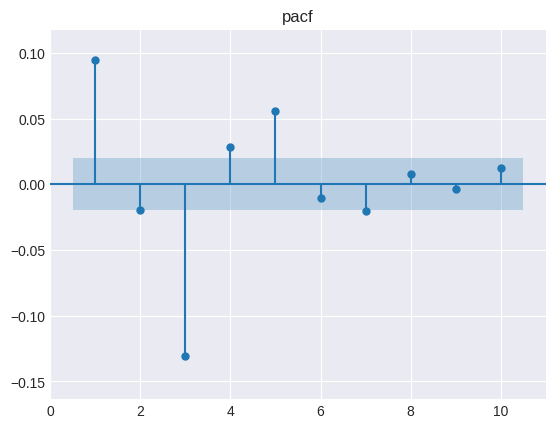

In [372]:
gen = scipy.stats.norm(0, 0.007)
a_t = gen.rvs(10_000)
r_t = []

for i, a in enumerate(a_t):
    if i <= 5:
        r_lag = np.array(r_t[:i+1])
        p_lag = np.array(p[:i])[::-1]
        r_i = c + a + np.sum(p_lag*r_lag)
        r_t.append(r_i)
        continue

    r_lag = np.array(r_t[i-5:i])
    p_lag = p[::-1]
    r_i = c + a + np.sum(p_lag * r_lag)
    r_t.append(r_i)

plt.hist(a_t, bins=100)
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(r_t, label='r_t', c='blue', alpha=0.75)

ax.legend()
plt.show()

lags = 10

autocorrelations = acf(r_t, nlags=lags)
print(autocorrelations)

plot_acf(r_t, alpha=0.05, lags=lags, zero=False, auto_ylims=True, title=f'acf')
plot_pacf(r_t, alpha=0.05, lags=lags, zero=False, auto_ylims=True, title=f'pacf')
plt.show()

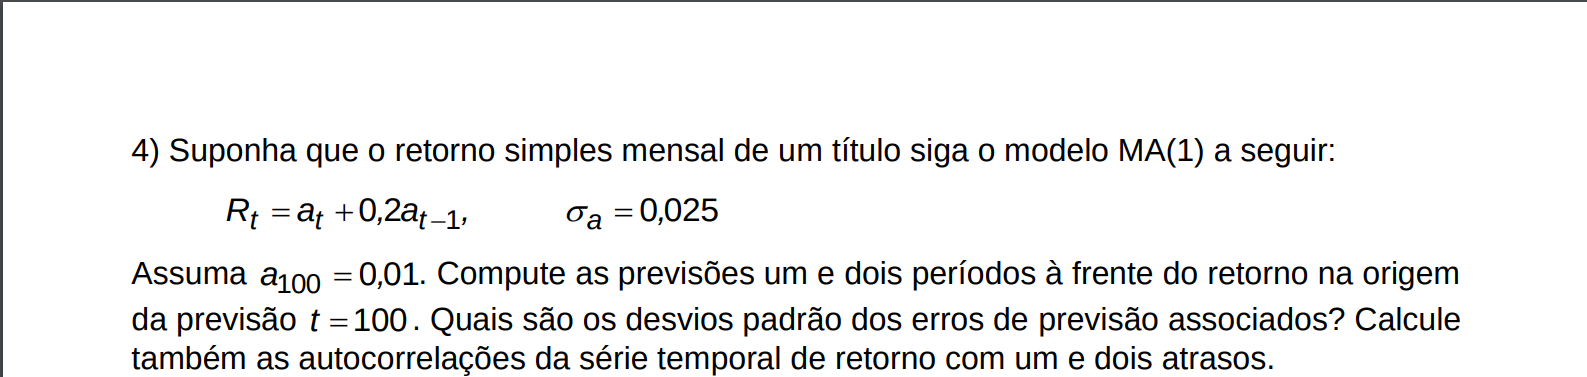

$$
R_{t} = \mu + a_t + \theta a_{t-1}
$$

então para esse modelo, $\mu=0$ e $\theta=0.2$

então
$$
\hat{R}_{t+1|t} = \mathbf{E}(R_{t+1} | \mathbf{X_t}) = \mu + \theta a_t
$$

ou seja
$$
\hat{R}_{t+1|t} = 0.2*a_t
$$

$$
\hat{R}_{101} = 0.2*a_{100} = 0.2*0.01 = 0.002
$$

$$
\hat{R}_{102} = \mu = 0
$$

$$
e_{t+1} = R_{t+1} - \hat{R}_{t+1} = \mu + a_{t+1} + \theta a_{t} - \mu - \theta a_t = a_{t+1}
$$ 

$$
\implies \mathbf{E}(e) = 0; Var(e) = \sigma^2
$$

Então o desvio padrão do erro é 

$$
\sigma_e = \sigma_a = 0.025
$$

A autocorrelação para 1 e 2 atrasos são

$$
\rho_1 = \frac{\theta}{1+\theta^2} = 0.1923
$$
$$
\rho_2 = 0
$$


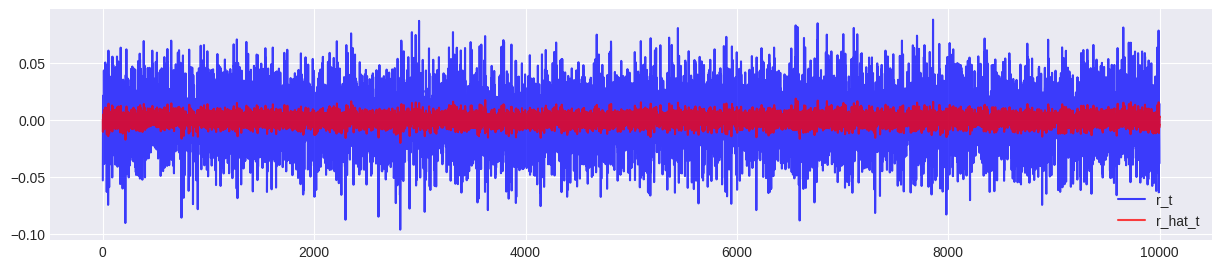

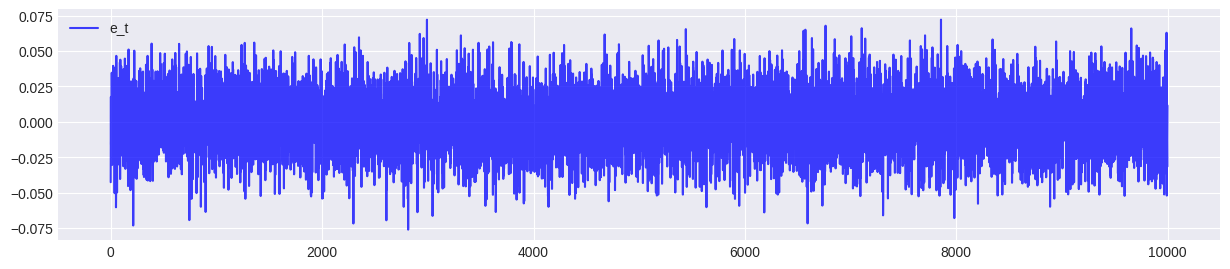

Mean error: 0.0001545023639346431, std error 0.020658306493996102

Autocorrelations: [ 1.000000e+00  1.838156e-01  1.630080e-03 -4.698941e-03 -2.281925e-04
  1.262268e-02]


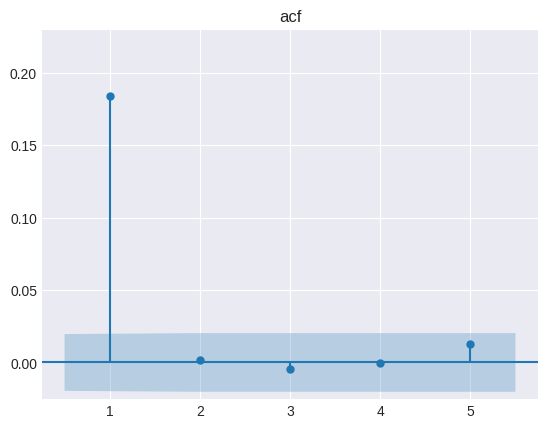

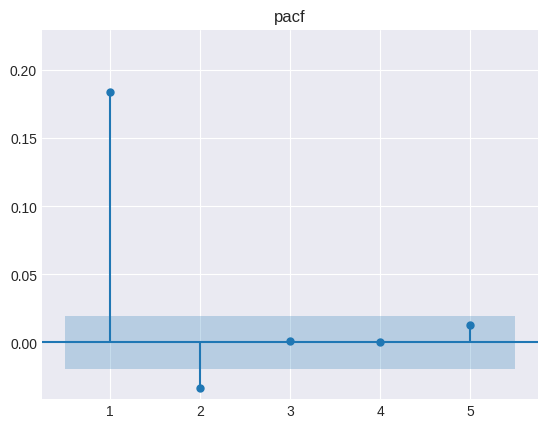

In [388]:
gen = scipy.stats.norm(0, 0.025)
a_t = gen.rvs(10_000)
r_t = []
r_hat_t = [0]


for i, a in enumerate(a_t):
    if i == 0:
        continue
    r_t.append(a + a_t[i-1]*0.2)
    r_hat_t.append(0.2*a)

r_t = np.array(r_t)
r_hat_t = np.array(r_hat_t)
e_t = r_t - r_hat_t[1:]

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(r_t, label='r_t', c='blue', alpha=0.75)
ax.plot(r_hat_t, label='r_hat_t', c='red', alpha=0.75)
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(e_t, label='e_t', c='blue', alpha=0.75)
ax.legend()
plt.show()

print(f'Mean r_t: {np.mean(e_t)}, std error {np.std(e_t)}')
print()

lags = 5

autocorrelations = acf(r_t, nlags=lags)
print(f'Autocorrelations: {autocorrelations}')

plot_acf(r_t, alpha=0.05, lags=lags, zero=False, auto_ylims=True, title=f'acf')
plot_pacf(r_t, alpha=0.05, lags=lags, zero=False, auto_ylims=True, title=f'pacf')
plt.show()

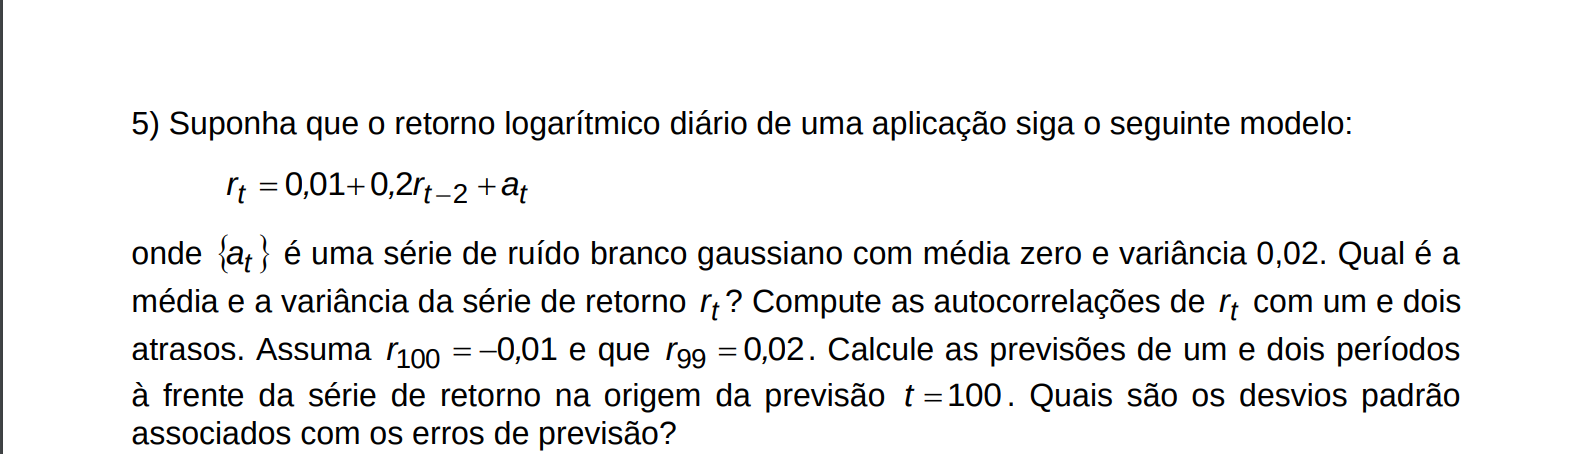

$$
R_{t} = c + \phi_1R_{t-1} + \phi_2R_{t-2} + a_t
$$

então para esse modelo, $c=0.01$, $\phi_1=0$ e $\phi_2=0.2$ 

$$
(1-\phi_1L - \phi_2L^2)R_{t} = \mu + a_t
$$

As raízes do polinômio são $(-2.236, 2.236)$, então a média é

$$
\mu = \frac{c}{1-\phi_2} = 0.0125
$$

A previsão para um período é

$$
\hat{R}_{t+1|t} = c + \phi_2*R_{t-1} + a_{t-1}
$$

$$
\hat{R}_{101} = 0.01 + 0.2*-0.01 + a_{t-1}
$$



<!-- 
$$
\hat{R}_{t+1|t} = \mathbf{E}(R_{t+1} | \mathbf{X_t}) = \mu + \theta a_t
$$

ou seja
$$
\hat{R}_{t+1|t} = 0.2*a_t
$$

$$
\hat{R}_{101} = 0.2*a_{100} = 0.2*0.01 = 0.002
$$

$$
\hat{R}_{102} = \mu = 0
$$

$$
e_{t+1} = R_{t+1} - \hat{R}_{t+1} = \mu + a_{t+1} + \theta a_{t} - \mu - \theta a_t = a_{t+1}
$$ 

$$
\implies \mathbf{E}(e) = 0; Var(e) = \sigma^2
$$

Então o desvio padrão do erro é 

$$
\sigma_e = \sigma_a = 0.025
$$

A autocorrelação para 1 e 2 atrasos são

$$
\rho_1 = \frac{\theta}{1+\theta^2} = 0.1923
$$
$$
\rho_2 = 0
$$
 -->

In [396]:
0.01/(1-0.2)

0.012499999999999999

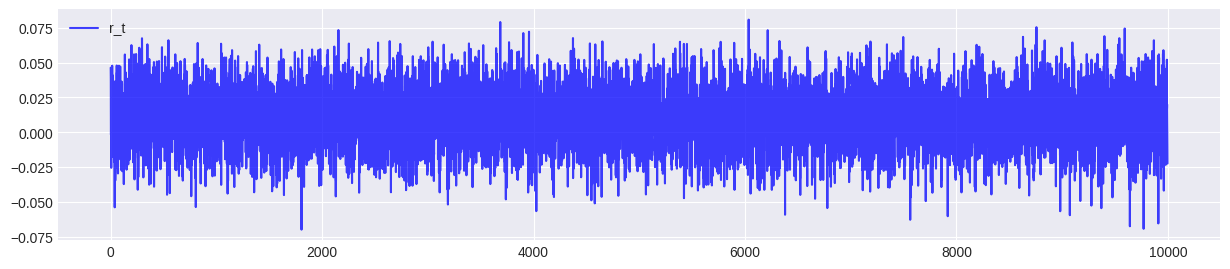

Mean r_t: 0.010031791398996518, std r_t 0.020414799690894114

Autocorrelations: [ 1.        0.022145  0.195191  0.015625 -0.004058 -0.009864]


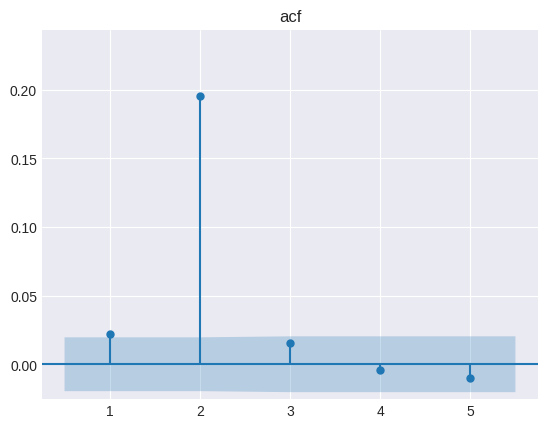

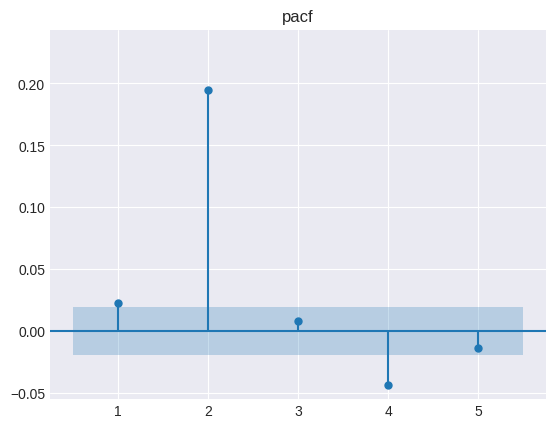

In [394]:
gen = scipy.stats.norm(0, 0.02)
a_t = gen.rvs(10_000)
r_t = []
r_hat_t = [0,0]


for i, a in enumerate(a_t):
    if i < 2:
        continue
    r_t.append(a + a_t[i-2]*0.2 + 0.01)
    # r_hat_t.append(0.2*a)

r_t = np.array(r_t)
# r_hat_t = np.array(r_hat_t)
# e_t = r_t - r_hat_t[1:]

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(r_t, label='r_t', c='blue', alpha=0.75)
# ax.plot(r_hat_t, label='r_hat_t', c='red', alpha=0.75)
ax.legend()
plt.show()

# fig, ax = plt.subplots(figsize=(15,3))
# ax.plot(e_t, label='e_t', c='blue', alpha=0.75)
# ax.legend()
# plt.show()

print(f'Mean r_t: {np.mean(r_t)}, std r_t {np.std(r_t)}')
print()

lags = 5

autocorrelations = acf(r_t, nlags=lags)
print(f'Autocorrelations: {autocorrelations}')

plot_acf(r_t, alpha=0.05, lags=lags, zero=False, auto_ylims=True, title=f'acf')
plot_pacf(r_t, alpha=0.05, lags=lags, zero=False, auto_ylims=True, title=f'pacf')
plt.show()

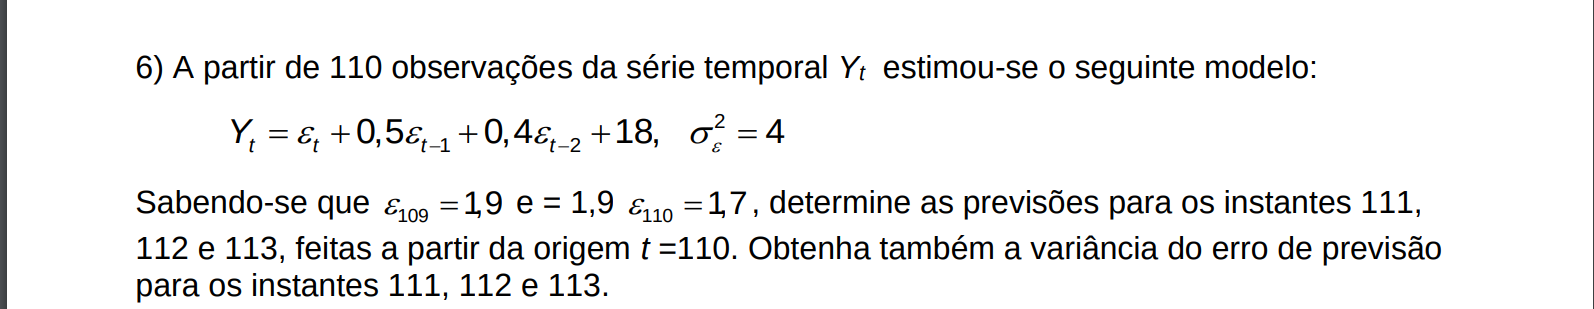